<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_32/blob/main/Reto_Entrega_2_Clasificaci%C3%B3n_ensambles_presentaci%C3%B3n_ejecutiva_equipo32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto entrega 1 y 2

Brenda Zurazy Rodríguez Pérez

Cristian Jhovany Montelongo Medina 

**A01793984**

**A01793580**

---

Materia: Ciencia y analítica de Datos

Maestra: Maria de la Paz Rico

**16/noviembre/2022**

# 1. Limpieza, análisis, visualización y agrupamiento.

**1. Limpieza de base de datos.**

In [346]:
import pandas as pd
#requests es para extraer la información de una página HTTP
import requests 
#zipfile proporciona herramientas para crear, leer, escribir, agregar y listar un archivo ZIP.
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [347]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [348]:
import geopandas as gpd
from shapely.geometry import Point

In [349]:
#Leemos el archivo y vemos una muestra de 10 renglones
input='http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip';
req = requests.get(input)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
aguas_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
aguas_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [350]:
aguas_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [351]:
#Revisamos el tip de variable que tenemos en BD
aguas_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Tenemos una base con 1,068 observaciones y 57 variables.

Se tienen 5 variables tipo **float** y 5 tipo **object** y 1 **entero**

In [352]:
#¿falta algún dato?
aguas_sub.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [353]:
#Contar nulos por variable
aguas_sub.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [354]:
#Contando el total de datos faltantes
aguas_sub.isnull().sum().sum()

1532

Hay 13 variables con datos nulos. En especial la variable **SDT_mg/L está completamente vacía.**

In [355]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
aguas = aguas_sub.copy()
aguas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [356]:
aguas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [357]:
#Revisando las variables numéricas
#Eliminamos la variables 'SDT_mg/L' ya que como vimos anteriormente, está vacia
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df_aguas = aguas[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]
df_aguas

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [358]:
#¿falta algún dato?
df_aguas.isnull().values.any()

True

In [359]:
#Contar nulos por variable
df_aguas.isnull().sum().sort_values(ascending=True)

FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
DUR_mg/L               1
N_NO3_mg/L             1
SDT_M_mg/L             2
ALC_mg/L               4
CONDUCT_mS/cm          6
dtype: int64

In [360]:
#Contando el total de datos faltantes
df_aguas.isnull().sum().sum()   

14

## Corregimos el tipo de variable

In [361]:
df_aguas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   object 
 3   FLUORUROS_mg/L       1068 non-null   object 
 4   DUR_mg/L             1067 non-null   object 
 5   COLI_FEC_NMP/100_mL  1068 non-null   object 
 6   N_NO3_mg/L           1067 non-null   object 
 7   AS_TOT_mg/L          1068 non-null   object 
 8   CD_TOT_mg/L          1068 non-null   object 
 9   CR_TOT_mg/L          1068 non-null   object 
 10  HG_TOT_mg/L          1068 non-null   object 
 11  PB_TOT_mg/L          1068 non-null   object 
 12  MN_TOT_mg/L          1068 non-null   object 
 13  FE_TOT_mg/L          1068 non-null   object 
dtypes: float64(2), object(12)
memory usage: 116.9+ KB


In [362]:
y= pd.DataFrame(aguas['SEMAFORO'])
y
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [363]:
df_aguas['SDT_M_mg/L'].value_counts()

496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64

In [364]:
#Corrigiendo los valores 
list_FLUORUROS = ['<25']
a=df_aguas[['SDT_M_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'SDT_M_mg/L'] in list_FLUORUROS:
     df_aguas.loc[i, 'SDT_M_mg/L'] = '25'
#Convertimos las vatiables objeto a tipo float
from IPython.core.interactiveshell import error
df_aguas['SDT_M_mg/L']=df_aguas['SDT_M_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [365]:
#Revisando la frecuencia:
df_aguas['FLUORUROS_mg/L'].value_counts()

<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 862, dtype: int64

In [366]:
#Corrigiendo los valores 
list_FLUORUROS = ['<0.2']
a=df_aguas[['FLUORUROS_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'FLUORUROS_mg/L'] in list_FLUORUROS:
     df_aguas.loc[i, 'FLUORUROS_mg/L'] = '0.2'
#Convertimos las vatiables objeto a tipo float
from IPython.core.interactiveshell import error
df_aguas['FLUORUROS_mg/L']=df_aguas['FLUORUROS_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [367]:
#Revisando la frecuencia:
df_aguas['DUR_mg/L'].value_counts()

<20        26
121.512     6
53.8542     4
109.56      4
428.27      3
           ..
51.454      1
103         1
24.8725     1
71.6184     1
362.544     1
Name: DUR_mg/L, Length: 889, dtype: int64

In [368]:
#Corrigiendo los valores 
list_DUR_mgL = ['<20']
a=df_aguas[['DUR_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'DUR_mg/L'] in list_DUR_mgL:
     df_aguas.loc[i, 'DUR_mg/L'] = '20'
#Convertimos las variables objeto a tipo float
df_aguas['DUR_mg/L']=df_aguas['DUR_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [369]:
#Revisando la frecuencia:
df_aguas['COLI_FEC_NMP/100_mL'].value_counts()

<1.1    737
10       37
40       28
20       19
31       13
       ... 
1607      1
175       1
2247      1
530       1
1658      1
Name: COLI_FEC_NMP/100_mL, Length: 125, dtype: int64

In [370]:
#Corrigiendo los valores 
list_COLI_FEC_NMP = ['<1.1']
a=df_aguas[['COLI_FEC_NMP/100_mL']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'COLI_FEC_NMP/100_mL'] in list_COLI_FEC_NMP:
     df_aguas.loc[i, 'COLI_FEC_NMP/100_mL'] = '1.1'
#Convertimos las variables objeto a tipo float
df_aguas['COLI_FEC_NMP/100_mL']=df_aguas['COLI_FEC_NMP/100_mL'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [371]:
df_aguas['N_NO3_mg/L'].value_counts()

<0.02       65
0.096        3
0.163        2
1.955        2
0.147        2
            ..
0.7694       1
1.2477       1
0.0497       1
0.1972       1
0.811876     1
Name: N_NO3_mg/L, Length: 995, dtype: int64

In [372]:
#Corrigiendo los valores 
list_N_NO3 = ['<0.02']
a=df_aguas[['N_NO3_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'N_NO3_mg/L'] in list_N_NO3:
     df_aguas.loc[i, 'N_NO3_mg/L'] = '0.02'
#Convertimos las vrtiables objeto a tipo float
df_aguas['N_NO3_mg/L']=df_aguas['N_NO3_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [373]:
#Revisando la frecuencia:
df_aguas['AS_TOT_mg/L'].value_counts()

<0.01     815
0.0135      4
0.0201      3
0.0217      3
0.0154      3
         ... 
0.027       1
0.0334      1
0.0376      1
0.0208      1
0.1397      1
Name: AS_TOT_mg/L, Length: 209, dtype: int64

In [374]:
#Corrigiendo los valores 
list_AS_TOT = ['<0.01']
a=df_aguas[['AS_TOT_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'AS_TOT_mg/L'] in list_AS_TOT:
     df_aguas.loc[i, 'AS_TOT_mg/L'] = '0.01'
#Convertimos las variables objeto a tipo float
df_aguas['AS_TOT_mg/L']=df_aguas['AS_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [375]:
#Revisando la frecuencia:
df_aguas['CD_TOT_mg/L'].value_counts()

<0.003     1066
0.0056        1
0.03211       1
Name: CD_TOT_mg/L, dtype: int64

In [376]:
#Corrigiendo los valores 
list_CD_TOT = ['<0.003']
a=df_aguas[['CD_TOT_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'CD_TOT_mg/L'] in list_CD_TOT:
     df_aguas.loc[i, 'CD_TOT_mg/L'] = '0.003'
#Convertimos las variables objeto a tipo float
df_aguas['CD_TOT_mg/L']=df_aguas['CD_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [377]:
#Revisando la frecuencia:
df_aguas['CR_TOT_mg/L'].value_counts()

<0.005     854
0.005        7
0.0051       6
0.0053       5
0.0052       4
          ... 
0.02508      1
0.01684      1
0.01874      1
0.03963      1
0.01341      1
Name: CR_TOT_mg/L, Length: 168, dtype: int64

In [378]:
#Corrigiendo los valores 
list_CR_TOT = ['<0.005']
a=df_aguas[['CR_TOT_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'CR_TOT_mg/L'] in list_CR_TOT:
     df_aguas.loc[i, 'CR_TOT_mg/L'] = '0.005'
#Convertimos las variables objeto a tipo float
df_aguas['CR_TOT_mg/L']=df_aguas['CR_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [379]:
#Revisando la frecuencia:
df_aguas['HG_TOT_mg/L'].value_counts()

<0.0005    968
0.0006      13
0.0005       9
0.00086      4
0.00051      3
          ... 
0.00216      1
0.0014       1
0.00168      1
0.00135      1
0.00062      1
Name: HG_TOT_mg/L, Length: 61, dtype: int64

In [380]:
#Corrigiendo los valores 
list_HG_TOT = ['<0.0005']
a=df_aguas[['HG_TOT_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'HG_TOT_mg/L'] in list_HG_TOT:
     df_aguas.loc[i, 'HG_TOT_mg/L'] = '0.0005'
#Convertimos las variables objeto a tipo float
df_aguas['HG_TOT_mg/L']=df_aguas['HG_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [381]:
#Revisando la frecuencia:
df_aguas['PB_TOT_mg/L'].value_counts()

<0.005     1038
0.01225       1
0.00709       1
0.00596       1
0.046         1
0.005         1
0.00744       1
0.00644       1
0.00619       1
0.00703       1
0.0133        1
0.00734       1
0.00557       1
0.00777       1
0.01075       1
0.0116        1
0.0399        1
0.00556       1
0.00859       1
0.0086        1
0.00769       1
0.00737       1
0.00818       1
0.00813       1
0.01117       1
0.0152        1
0.0219        1
0.0809        1
0.0135        1
0.049         1
0.0053        1
Name: PB_TOT_mg/L, dtype: int64

In [382]:
#Corrigiendo los valores 
list_PB_TOT = ['<0.005']
a=df_aguas[['PB_TOT_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'PB_TOT_mg/L'] in list_PB_TOT:
     df_aguas.loc[i, 'PB_TOT_mg/L'] = '0.005'
#Convertimos las variables objeto a tipo float
df_aguas['PB_TOT_mg/L']=df_aguas['PB_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [383]:
#Revisando la frecuencia:
df_aguas['MN_TOT_mg/L'].value_counts()

<0.0015    545
0.0017      12
0.0021      10
0.0016       9
0.003        8
          ... 
0.0056       1
0.0193       1
0.00445      1
0.0208       1
0.0242       1
Name: MN_TOT_mg/L, Length: 362, dtype: int64

In [384]:
#Corrigiendo los valores 
list_MN_TOT = ['<0.0015']
a=df_aguas[['MN_TOT_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'MN_TOT_mg/L'] in list_MN_TOT:
     df_aguas.loc[i, 'MN_TOT_mg/L'] = '0.0015'
#Convertimos las variables objeto a tipo float
df_aguas['MN_TOT_mg/L']=df_aguas['MN_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [385]:
#Revisando la frecuencia:
df_aguas['FE_TOT_mg/L'].value_counts()

<0.025    401
0.0288      4
0.0492      4
0.0471      3
0.0564      3
         ... 
0.1118      1
0.0565      1
0.3947      1
0.0858      1
0.1786      1
Name: FE_TOT_mg/L, Length: 615, dtype: int64

In [386]:
#Corrigiendo los valores 
list_FE_TOT = ['<0.025']
a=df_aguas[['FE_TOT_mg/L']].mode()
for i in df_aguas.index:
  if df_aguas.loc[i, 'FE_TOT_mg/L'] in list_FE_TOT:
     df_aguas.loc[i, 'FE_TOT_mg/L'] = '0.025'
#Convertimos las variables objeto a tipo float
df_aguas['FE_TOT_mg/L']=df_aguas['FE_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [387]:
print(df_aguas.columns)
print(df_aguas.info())
print(df_aguas.isnull().sum())

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1

In [388]:
#df_aguas

columnas_numericas_new= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] #sin ,'SDT_mg/L'


for name in columnas_numericas_new:
  mediana = df_aguas[name].median() 
  df_aguas[name]= df_aguas[name].replace(np.nan, mediana)

df_aguas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [389]:
#Describe
print(df_aguas.describe())
#Para transposicionarlo usamos el .T
df_aguas.describe().T

          ALC_mg/L  CONDUCT_mS/cm    SDT_M_mg/L  FLUORUROS_mg/L     DUR_mg/L  \
count  1068.000000    1068.000000   1068.000000     1068.000000  1068.000000   
mean    235.558455    1137.133052    895.454185        1.075600   347.842003   
std     116.661485    1242.292889   2748.991295        1.924278   359.514579   
min      26.640000      50.400000     25.000000        0.200000    20.000000   
25%     164.048750     505.500000    337.700000        0.267175   121.274100   
50%     215.527500     815.000000    550.400000        0.503500   245.335800   
75%     292.423750    1321.250000    915.900000        1.139850   453.930000   
max    1650.000000   18577.000000  82170.000000       34.803300  3810.692200   

       COLI_FEC_NMP/100_mL   N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  \
count          1068.000000  1068.000000  1068.000000  1068.000000   
mean            355.490356     4.317663     0.019618     0.003030   
std            2052.457014     8.341504     0.035209     0.000894   
min

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.6400,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.4000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.0000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.0000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.0200,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.013276,0.154391,0.0050,0.005000,0.005000,0.005000,5.003200


**2. Visualización.**

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([434.,   0., 387.,   0., 247.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

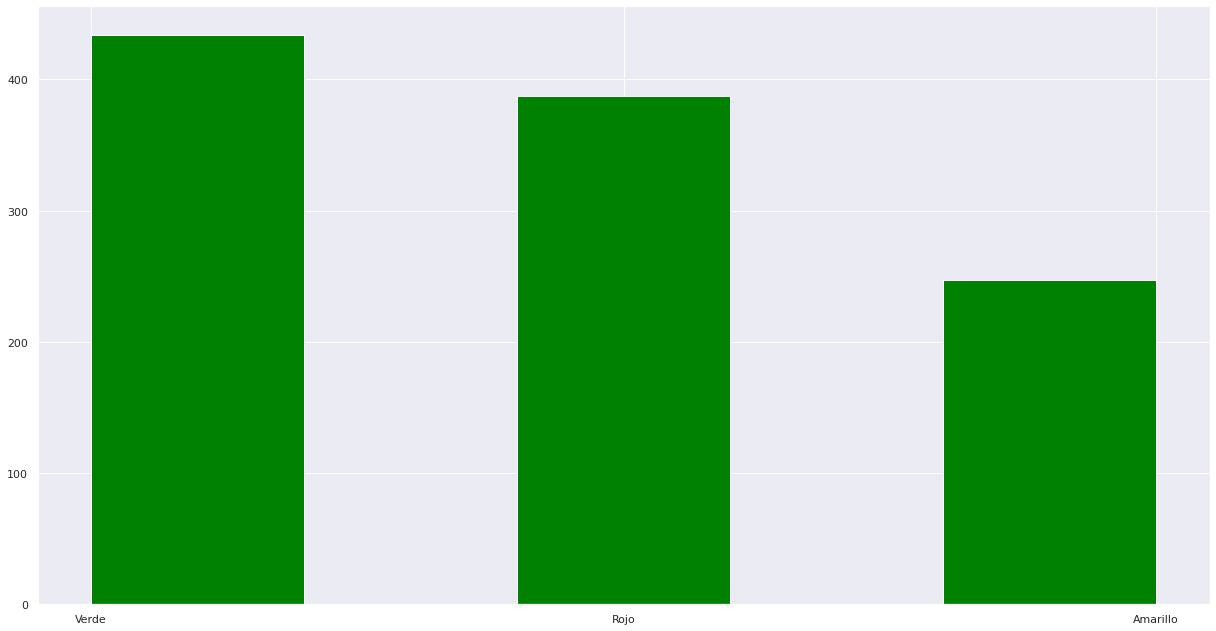

In [391]:
plt.hist(y['SEMAFORO'], bins=5, color ='green')

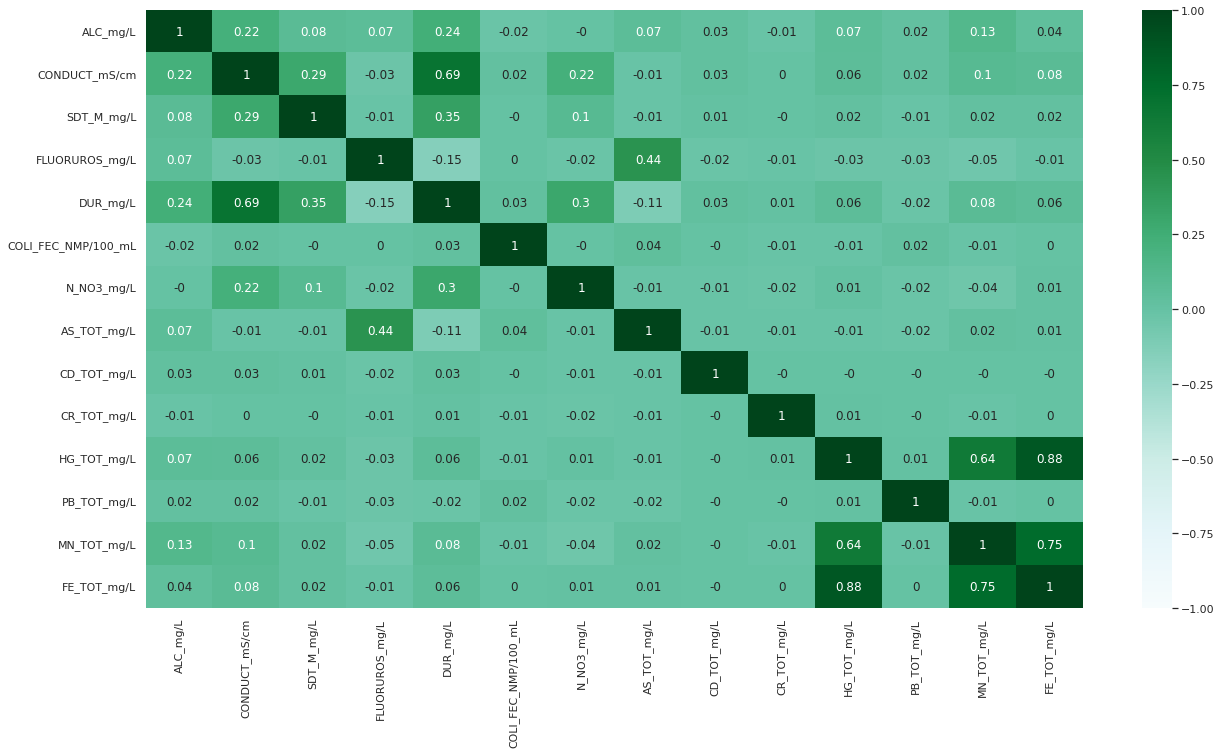

In [392]:
#Veamos la correlación de las variables
corrs = df_aguas.corr().round(2)

sns.set(rc = {'figure.figsize': (21,11)})
sns.heatmap(corrs, vmin=-1, vmax=1, cmap ='BuGn', annot_kws={'size':12}, annot=True)

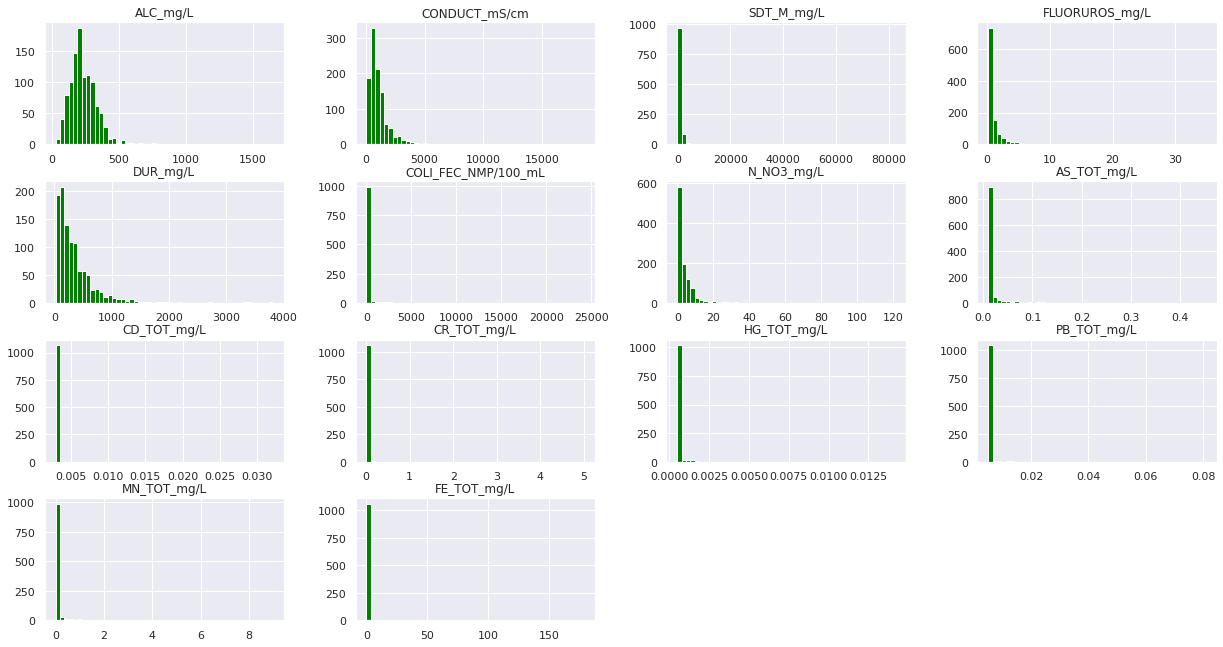

In [393]:
df_aguas.hist(bins=50, color ='green')
plt.show()

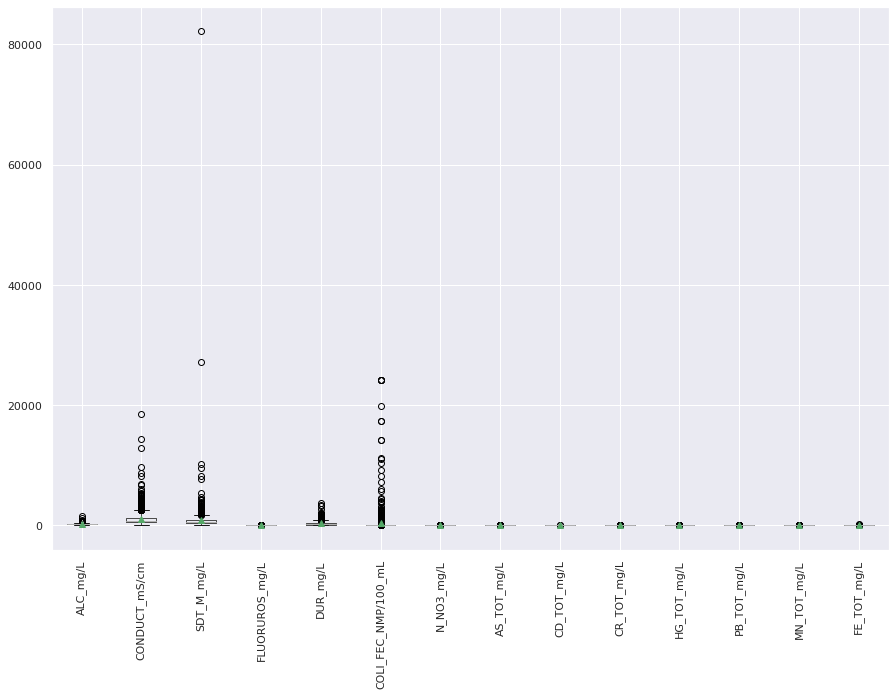

In [394]:
outliers = df_aguas.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

**3. Agrupamiento.**

In [395]:
#identificamos las variables para graficar la ubicacion geografica
df_geo = aguas[['LONGITUD','LATITUD']]
df_geo

y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


### **Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

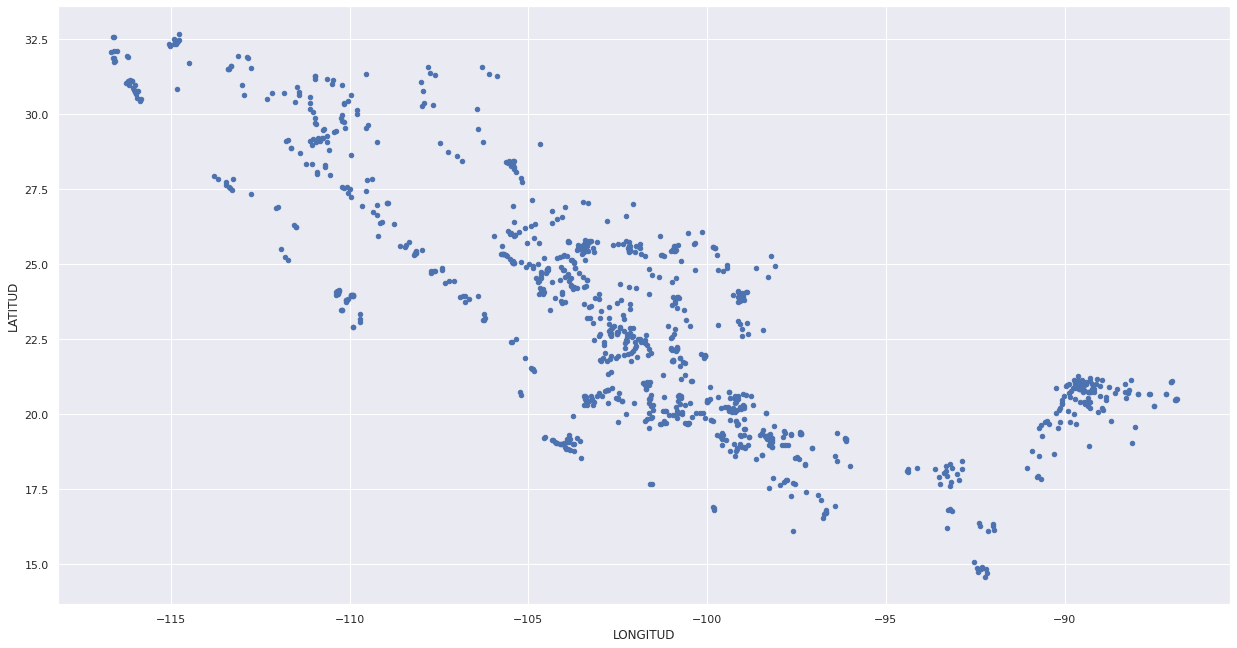

In [396]:
df_geo.plot.scatter('LONGITUD','LATITUD')

In [397]:
#Obteniendo coordenadas para Geopandas
df_geo
df_geo["COORDENADAS"] = list(zip(df_geo.LONGITUD, df_geo.LATITUD))
df_geo["COORDENADAS"] = df_geo["COORDENADAS"].apply(Point)
df_geo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


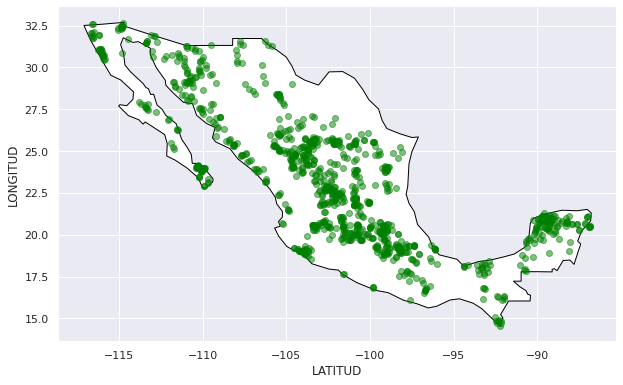

In [398]:
#Creando mapa con coordenadas
mapa_dots = gpd.GeoDataFrame(df_geo, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

mapa_dots.plot(ax=gax, color='green', alpha = 0.5)
mapa_dots

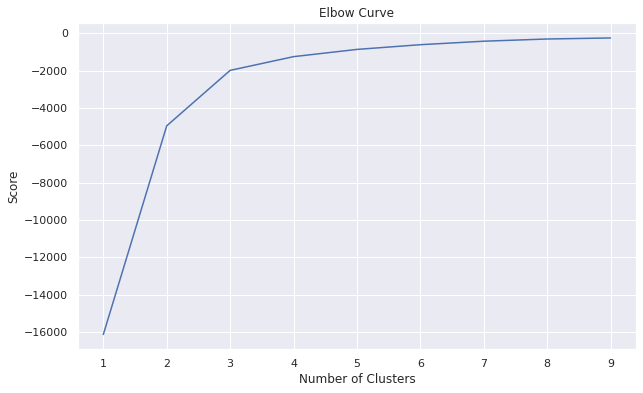

In [399]:
# Kmeans , vamos a agrupar por color o por ubicacion

from sklearn.cluster import KMeans


numero_de_closters = range(1,10) 
kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_geo[['LATITUD']]
X_axis = df_geo[['LONGITUD']]
kmeans_calculo = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, kmeans_calculo)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()



In [400]:
#Generando informacion de los 3 clusters
X = aguas_sub[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroides

,0,1,Coordinates
0,-105.349173,25.476554,POINT (-105.34917 25.47655)
1,-87.659191,20.587765,POINT (-87.65919 20.58776)
2,-98.897779,19.479686,POINT (-98.89778 19.47969)
3,-115.350697,31.630071,POINT (-115.35070 31.63007)
4,-102.166930,22.500169,POINT (-102.16693 22.50017)
5,-92.761627,17.004097,POINT (-92.76163 17.00410)
6,-110.195427,23.861448,POINT (-110.19543 23.86145)
7,-100.895150,20.548006,POINT (-100.89515 20.54801)
8,-107.296022,30.794375,POINT (-107.29602 30.79437)
9,-111.431437,27.574297,POINT (-111.43144 27.57430)


In [401]:
len(labels)

1068

In [402]:
#imprimimos los numeros de elementos por cluster
aguas_sub['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [403]:
print(y.head())
print(df_geo.head())

  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
    LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887  POINT (-102.02210 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138  POINT (-110.24480 23.45138)


In [404]:
y['SEMAPHORE'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

,SEMAFORO,SEMAPHORE
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


In [405]:
aguas['CALIDAD_COLI_FEC'].value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

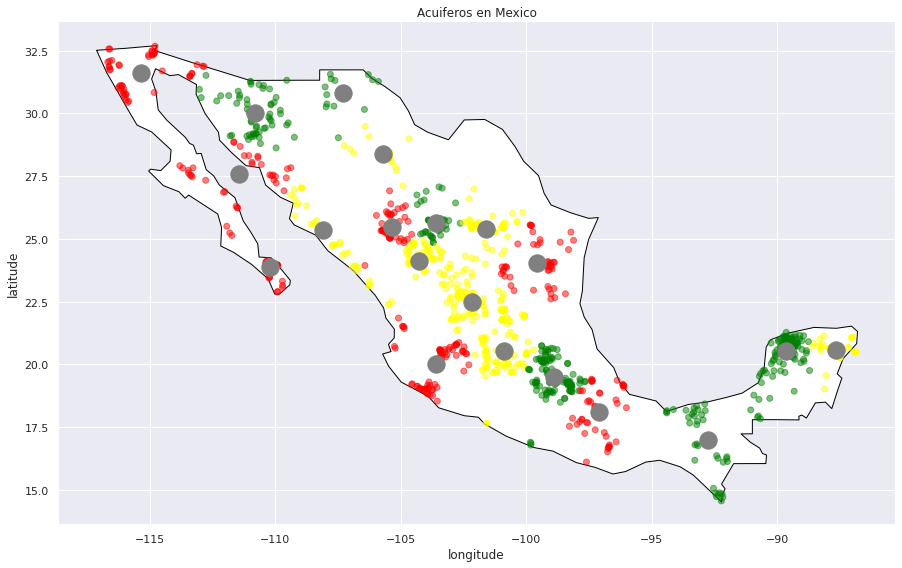

In [406]:
#Definiendo los centroides
fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

mapa_dots.plot(ax=gax, color=color_asig, alpha = 0.5) 
centroides.plot(ax=gax, color='gray', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [407]:
mapa_dots['COLOR']= y['SEMAFORO']
mapa_dots['CLUSTER'] = labels

mapa_dots

,LONGITUD,LATITUD,COORDENADAS,COLOR,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,4
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,4
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,4
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,4
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,6
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,15
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,15
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,15
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,15


In [408]:
new_dataset = mapa_dots[mapa_dots.CLUSTER == 0].copy()
new_dataset.shape

(41, 5)

# 2. Clasificación-ensambles y presentación ejecutiva.

### **Selecciona tus variables independientes X y dependiente Y (semáforo)**

In [409]:
# Se utilizaran las del data set previamente utilizado
print(df_aguas)
print(y)
print(df_aguas.shape)
print(y.shape)

      ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0      229.990          940.0    603.6000          0.9766  213.7320   
1      231.990          608.0    445.4000          0.9298  185.0514   
2      204.920          532.0    342.0000          1.8045  120.7190   
3      327.000          686.0    478.6000          1.1229  199.8790   
4      309.885         1841.0   1179.0000          0.2343  476.9872   
...        ...            ...         ...             ...       ...   
1063   231.045         2350.0   1545.8000          0.2000  752.0960   
1064   256.000          529.0    297.0000          0.2000  273.0000   
1065   330.690         2600.0   1873.0000          0.7574  660.2126   
1066   193.140          873.0    690.6667          0.7108  406.3680   
1067   263.070          817.0    495.0000          0.4002  362.5440   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0                     1.1    4.184656       0.0161        0.003    

### **Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

In [410]:
from sklearn import preprocessing

#Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
lbe = preprocessing.LabelEncoder()
y["SEMAFORO"]= lbe.fit_transform(y["SEMAFORO"])
y["SEMAFORO"].unique()

array([2, 1, 0])

In [411]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df_aguas[df_aguas.columns], y[['SEMAFORO']], test_size=0.2, random_state=1, stratify= y) #segun que el stratify nos va a balancear la y que esta desbalanceada

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(854, 14)
(214, 14)
(854, 1)
(214, 1)


In [412]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
397   131.000          400.0       317.0          0.3500  156.0000   
51     85.470          266.0       249.2          0.2664   91.0432   
920   277.200         1451.0      1096.0          0.4959  443.6708   
346   263.580          924.0       608.0          0.2000  272.3600   
529   184.000          637.0       348.0          0.2970  326.0000   
..        ...            ...         ...             ...       ...   
909   164.065         1385.0      1396.0          0.2693  457.4937   
3     327.000          686.0       478.6          1.1229  199.8790   
366   403.300          826.0       546.4          0.8505  243.4170   
733   369.000          786.0       521.0          0.2000  471.0000   
579   149.850          454.0       339.0          2.1357   91.6320   

     COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
397                 75.0    1.149000      0.01000        0.003      0.00500   
5

### **Realiza un análisis general de las features importances a traves de decision trees o random forest.**

In [413]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz

#Llamamos la clasificaicon del arbol
model_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced') #Aqui nos va a balancear la salida
model_tree = model_tree.fit(x_train, y_train)
arbol= export_graphviz (model_tree,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)


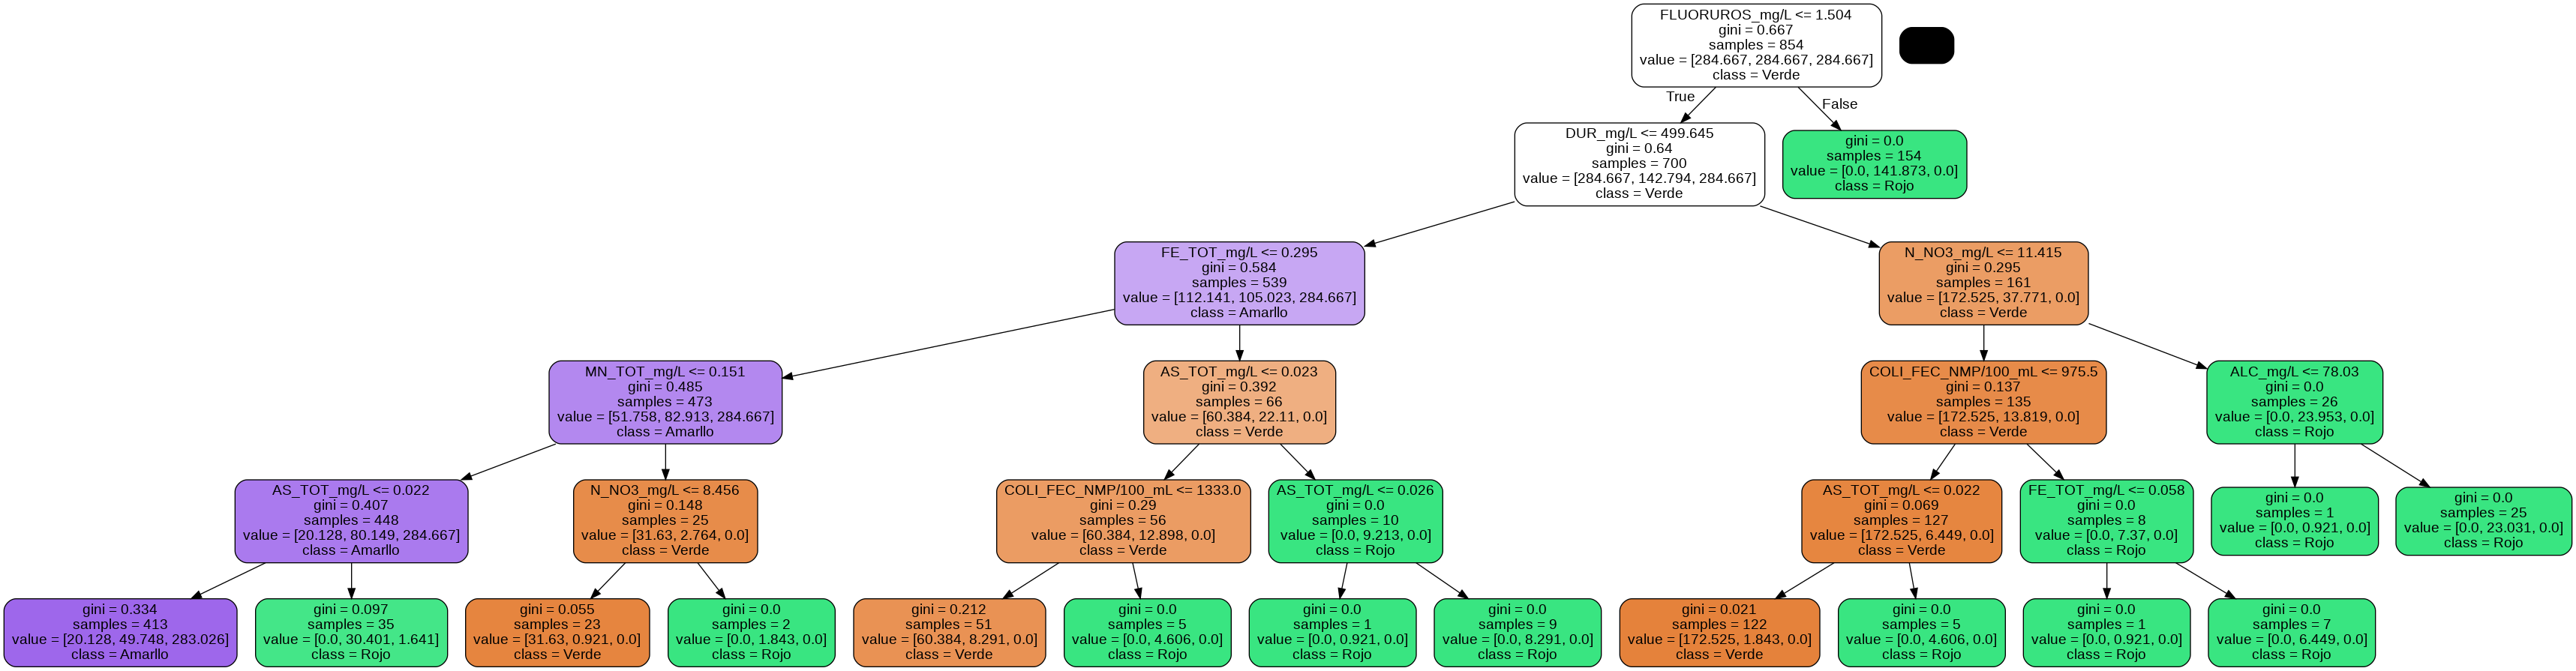

In [414]:
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol_colorido.png')
Image(filename = 'Arbol_colorido.png')

In [415]:
#Ahora tenemos que verificar la exactitud de nuestro arbol, por eso usaremos el>
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
#Tenemos que sacar las formulas para la matriz de confusion triple

def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)

In [416]:
Tree_Precision = model_tree.predict(x_test)
#Recuerden que y pred es el resultado de la prediccion de lo de arriba
print('Exactitud: ',mi_accuracy(y_test,Tree_Precision))

Exactitud:  0.8971962615156478


### **Selecciona las variables de mayor importancia.**

In [417]:
x_train.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [418]:
model_tree.feature_importances_

array([2.97923338e-16, 0.00000000e+00, 0.00000000e+00, 2.64733812e-01,
       2.34849976e-01, 4.62829247e-02, 9.26118401e-02, 1.30058292e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.69406769e-02, 1.34522478e-01])

### **Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

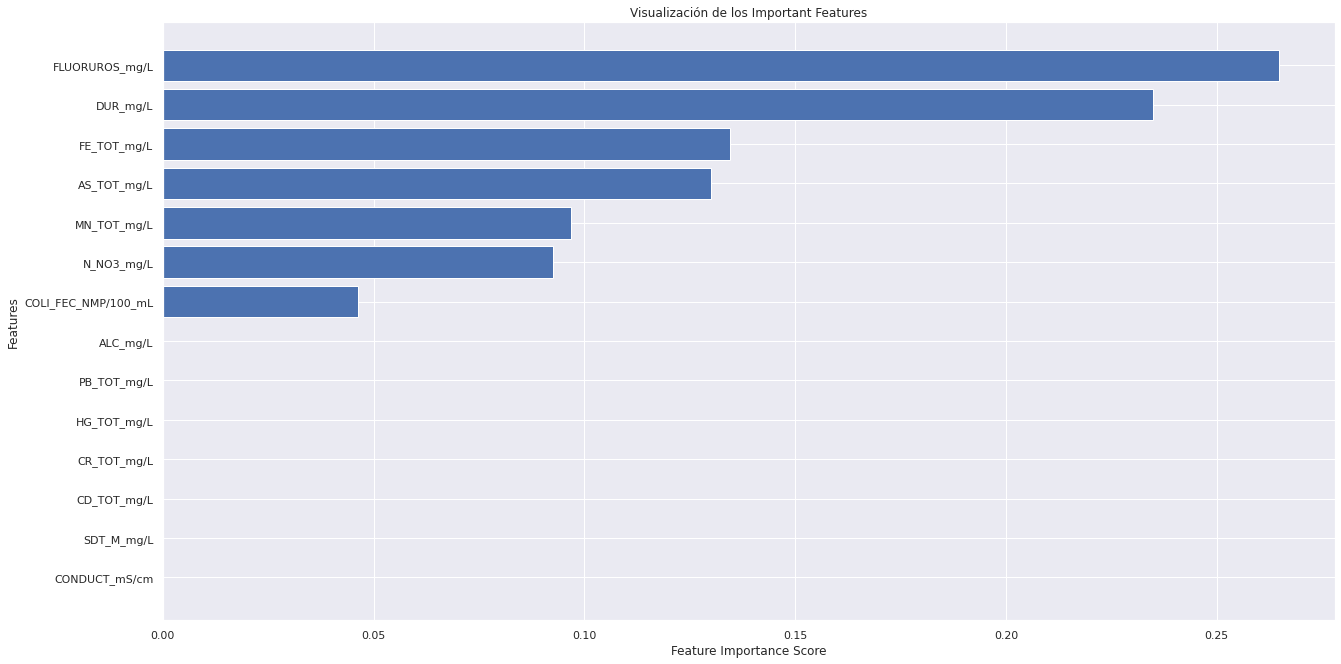

In [419]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model_tree.feature_importances_
indices = np.argsort(importances)
features= x_test.columns
plt.title('Visualización de los Important Features')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.show()

### **Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


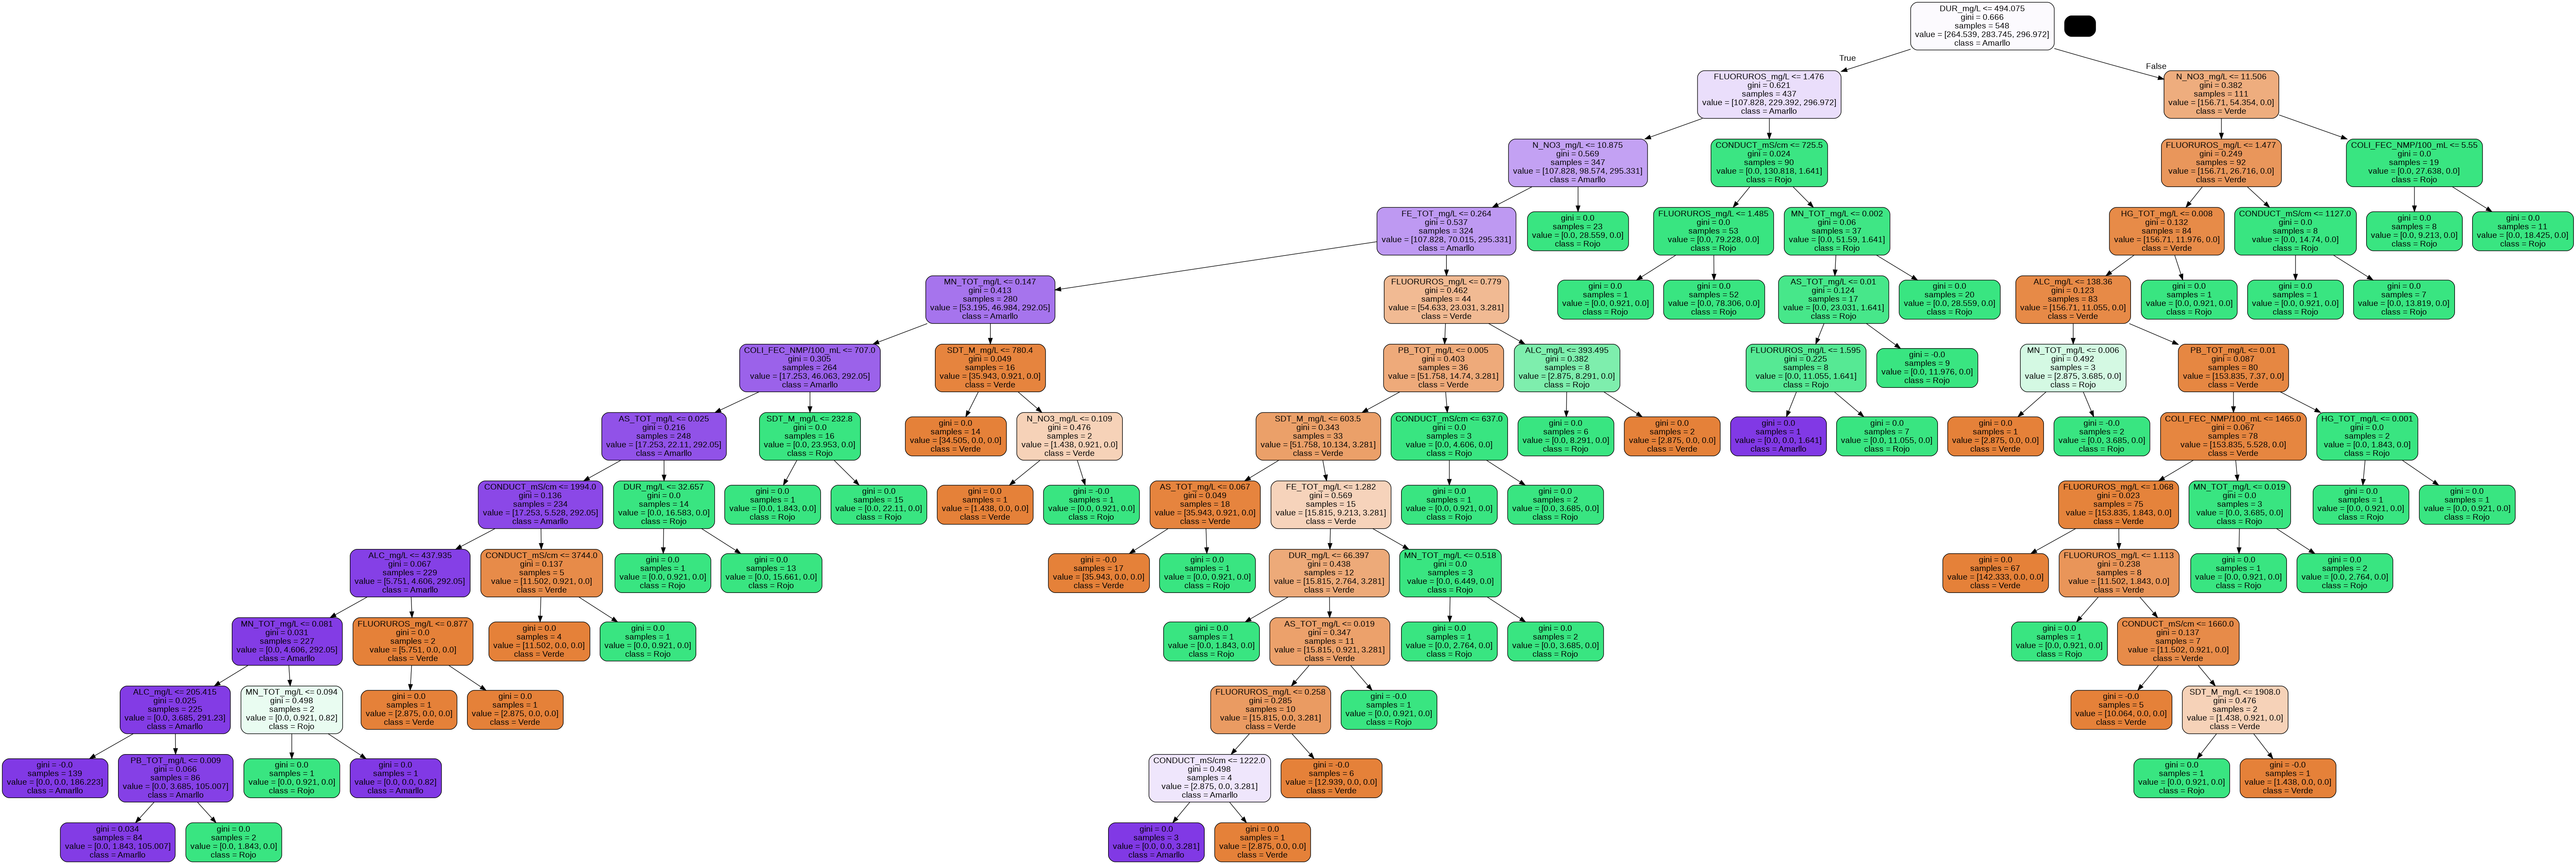

In [420]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#Ahora tenemos que hacer un randon forest, para despues obtener los mejores hiperparamentros
Random_forest = RandomForestClassifier(max_depth=12, random_state=42, class_weight='balanced') #Aqui nos va a balancear la salida
Random_model = Random_forest.fit(x_train, y_train)
Random_ultimate = Random_forest[10]
arbol= export_graphviz (Random_ultimate,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)


import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol_colorido.png')
Image(filename = 'Arbol_colorido.png')

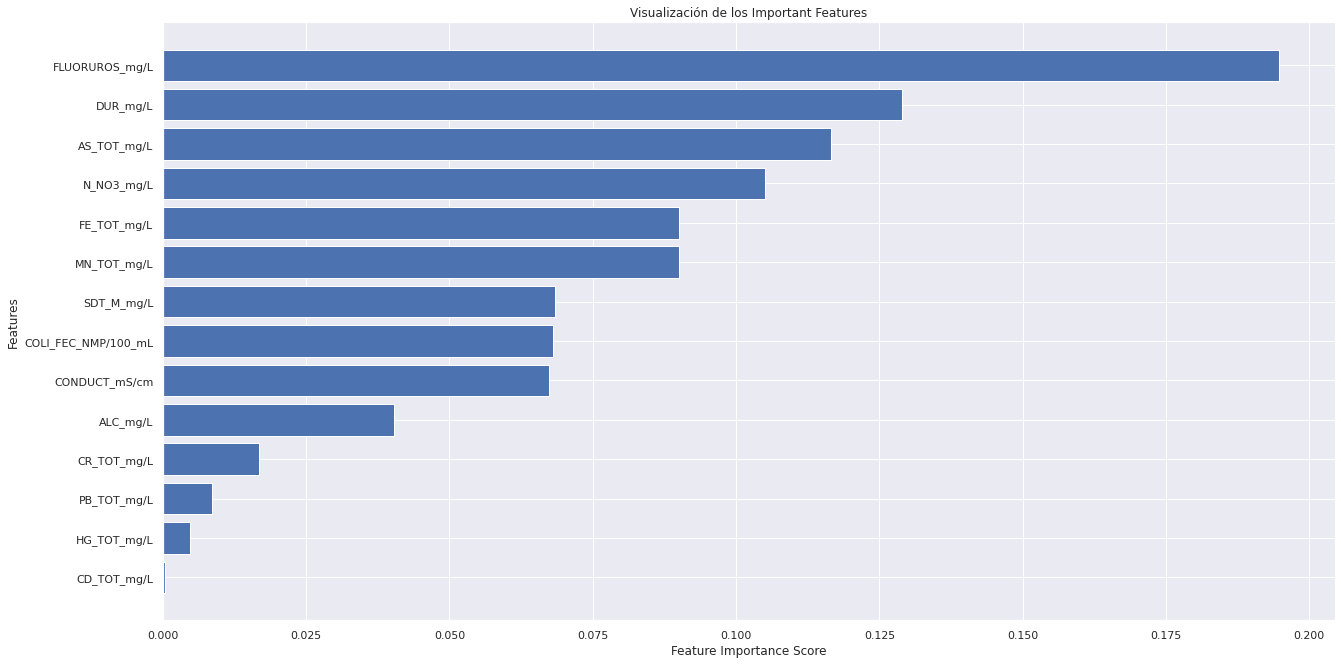

In [421]:
importances = Random_forest.feature_importances_
indices = np.argsort(importances)
features= x_test.columns
plt.title('Visualización de los Important Features')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.show()

In [422]:
Random_Forest_Precision = Random_forest.predict(x_test)
#Recuerden que y pred es el resultado de la prediccion de lo de arriba
print('Exactitud: ',mi_accuracy(y_test,Random_Forest_Precision))

Exactitud:  0.9626168222511637


### **Explora que clasificador es el más optimo, ejemplo:**
* Decision trees
* Random Forest.


In [423]:
from sklearn.ensemble import VotingClassifier
classifiers = [
                ['DecisionTree :',model_tree],
                ['RandomForest :',Random_ultimate] 
              ]
              
predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, np.ravel(y_train))
    predictions = classifier.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, mi_accuracy(y_test, predictions))

DecisionTree : 0.8971962615156478
RandomForest : 0.9127725855002944


### **Determina el grado de exactitud a través del reporte de clasificación**

In [424]:
from sklearn.metrics import classification_report
eclf1 = VotingClassifier(estimators=[ ('DecisionTree :' , model_tree),('RandomForest :',Random_ultimate)])
eclf1.fit(x_train, np.ravel(y_train))
predictions = eclf1.predict(x_test)
print("Classification report")
print(classification_report(y_test, predictions))


Classification report
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        49
           1       0.94      0.82      0.88        78
           2       0.98      0.94      0.96        87

    accuracy                           0.90       214
   macro avg       0.89      0.91      0.89       214
weighted avg       0.91      0.90      0.90       214

